## Assignment-07 First Step of using machine learning and models.

![](https://github.com/Computing-Intelligence/jupyters_and_slides/raw/master/entrance-test/images/kkb-ai.png)

### 任务描述

报社等相关的机构，往往会遇到一个问题，就是别人家的机构使用自己的文章但是并没有标明来源。 在本次任务中，我们将解决新华社的文章被抄袭引用的问题。

给定的数据集合中，存在一些新闻预料，该预料是来自新华社，但是其来源并不是新华社，请设计技巧学习模型解决该问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1566105348906&di=ee9a2de91207767364853d4decc6cca3&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_png%2FTicO2kbP6Ao5sCsSQDpehZiczLdC6hDCNvoicjcOCEKX2bLxBc9gVOw28zHyFibfIWq9ceRibP6HDTKReGkr6YyTfQQ%2F640%3Fwx_fmt%3Dpng)

In [1]:
import pandas as pd
import numpy
import re
import math
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import jieba
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

### Step1: 数据分析

请在课程的GitHub中下载数据集，然后使用pandas进行读取。

In [2]:
# it‘s your time
fname = r'C:\Users\7153678\Desktop\AI\src\nlp\data\sqlResult_1558435.csv'
content = pd.read_csv(fname, encoding='gb18030')
content.tail(2)

,id,author,source,content,feature,title,url
89609,2,夏文辉,新华社,\n\n2017年5月25日，在美国马萨诸塞州剑桥市，哈佛大学毕业生在毕业典礼上欢呼。（新华...,"{""type"":""其它"",""site"":""新华社"",""url"":""http://home.x...",哈佛大学为何取消这些新生入选资格？,http://home.xinhua-news.com/gdsdetailxhsnew/22...
89610,1,王子江 张寒,新华社,新华社德国杜塞尔多夫６月６日电题：乒乓女球迷 \n 新华社记者王子江、张寒\n 熊老...,"{""type"":""体育"",""site"":""新华社"",""url"":""http://home.x...",（体育）题：乒乓女球迷,http://home.xinhua-news.com/gdsdetailxhsnew/22...


### Step2: 数据预处理

将pandas中的数据，依据是否是新华社的文章，请改变成新的数据dataframe: <content, y>, 其中，content是文章内容，y是0或者1. 你可能要使用到pandas的dataframe操作。https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [3]:
# it's your time
def is_xinhua(x):
    if x['source'] ==  '新华社':
        return pd.Series([x['content'], 1], index=['content', 'y'])
    else:
        return pd.Series([x['content'], 0], index=['content', 'y'])

In [4]:
df = content.apply(is_xinhua, axis=1)

In [5]:
df_nona = df.dropna()

In [6]:
def clear_web_chars(ss, chars=r'\\n|&nbsp|\xa0|\\xa0|\u3000|\\u3000|\\u0020|\u0020'):
    if isinstance(ss, str):
        return re.sub(chars, '', ss) 
    else:
        return ss

In [7]:
df_final = df_nona.applymap(clear_web_chars)

In [8]:
df_final.head(2)

,content,y
0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,0.0
1,骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器，高通强调，不会因为只考虑...,0.0


### Step3: 使用tfidf进行文本向量化

参考 https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 对

对文本进行向量化

In [9]:
def cut(ss):
    ss_w = ''.join(re.findall(r'\w+', ss))
    return ' '.join(jieba.cut(ss_w))

In [10]:
corpus = [cut(ss) for ss in df_final['content']]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\7153678\AppData\Local\Temp\jieba.cache
Loading model cost 1.124 seconds.
Prefix dict has been built succesfully.


In [11]:
len(corpus)

87054

In [12]:
vectorizer = TfidfVectorizer(max_features=300, ngram_range=(1, 3))
X = vectorizer.fit_transform(corpus)
print(X.shape)

(87054, 300)


In [ ]:
vectorizer.get_feature_names()

### Step4: 参考scikit-learning的方法，构建你的第一个机器学习模型

+ 按照课程讲解的内容，把数据集分割为 traning_data, validation_data, test_data. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

+ 参照scikit learning的示例，从构建你的第一个KNN机器学习模型。

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

In [15]:
y = df_final['y']

In [16]:
X_train_var, X_test, y_train_var, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [17]:
X_train_var.shape, X_test.shape, y_train_var.shape, y_test.shape

((78348, 300), (8706, 300), (78348,), (8706,))

### Step5: 在traning_data, validation_data, test_data 上观察其相关metric: recall, precision, f1等， 并解释其含义. 

- accuracy: 在所有的文章中， 判断对的文章的比例
- recall: 在真正是新华社文章中，判断为新华社文章的比例， 
- precision: 在判断为新华社文章中，真正是是新华社文章的比例
- f1：recall和precision的加权平均

In [26]:
def df_mtrix(y_true, y_pred):
    var_accuracy = accuracy_score(y_true, y_pred)
    var_recall = recall_score(y_true, y_pred)
    var_precision = precision_score(y_true, y_pred)
    var_f1 = f1_score(y_true, y_pred)
    var_auc = roc_auc_score(y_true, y_pred)
    df_mtrix = pd.DataFrame([[var_accuracy, var_recall, var_precision, var_f1, var_auc]],
                            columns=['accuracy', 'recall', 'precision', 'f1', 'AUC'])
    return df_mtrix

In [20]:
# it's your time
x_train, x_var, y_train, y_var = train_test_split(X_train_var, y_train_var, test_size=0.1, random_state=42)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

In [21]:
y_pred_prob = neigh.predict_proba(x_var)

In [29]:
y_pred = y_pred_prob[:, 1]
y_pred[y_pred >= 0.9] = 1
y_pred[y_pred < 0.9] = 0

In [51]:
y_var_mtrix = df_mtrix(y_var, y_pred)
y_var_mtrix

,accuracy,recall,precision,f1,AUC
0,0.888322,0.894307,0.980683,0.935505,0.86258


In [23]:
fpr, tpr, threshods = roc_curve(y_var, y_pred_prob[:, 1])

In [24]:
threshods

array([2.        , 1.        , 0.66666667, 0.33333333, 0.        ])

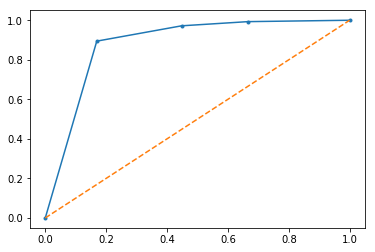

In [25]:
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

### Step6: 使用 test_data 对其进行新数据的判断, 你有没

In [53]:
# it's your time
y_ts_pred = neigh.predict(X_test)

In [54]:
y_ts_mtrix = df_mtrix(y_test, y_ts_pred)
y_ts_mtrix

,accuracy,recall,precision,f1,AUC
0,0.93315,0.975232,0.952015,0.963483,0.755323


### Step7: 调整不同的参数，观察变化

In [17]:
# it's your time
x_train, x_var, y_train, y_var = train_test_split(X_train_var, y_train_var, test_size=0.1, random_state=42)
neigh2 = KNeighborsClassifier(n_neighbors=5)
neigh2.fit(x_train, y_train)
y_pred2 = neigh2.predict(x_var)

In [18]:
y_var_mtrix2 = df_mtrix(y_var, y_pred2)
y_var_mtrix2

,accuracy,recall,precision,f1,AUC
0,0.928526,0.969983,0.952006,0.96091,0.750215


In [19]:
# it's your time
x_train, x_var, y_train, y_var = train_test_split(X_train_var, y_train_var, test_size=0.1, random_state=42)
neigh3 = KNeighborsClassifier(n_neighbors=5, weights='distance')
neigh3.fit(x_train, y_train)
y_pred3 = neigh3.predict(x_var)

In [20]:
y_var_mtrix3 = df_mtrix(y_var, y_pred3)
y_var_mtrix3

,accuracy,recall,precision,f1,AUC
0,0.934269,0.973224,0.955055,0.964054,0.76672


### Step8: 不断改变参数，直到性能达到“某个”点。问：“某个”怎么定义？

- 验证集的性能提升不明显，或者开始下降

### Step9: 找出所以预测为 1， 但是实际为 0 的文章。 作为抄袭的候选者。

In [22]:
# it's your time
# just get from test data, the whole data is too big for PC  as out of memory
y_ts_pred3 = neigh3.predict(X_test)

In [71]:
df_test = pd.DataFrame({'predict':y_ts_pred3})

In [81]:
df_test['tfidf_vec'] = X_test.toarray()

In [87]:
df_test.head(2)

,predict,tfidf_vec
0,1.0,0.0
1,1.0,0.0


In [82]:
df_final['tfidf_vec']=X.toarray()

In [86]:
df_final.head(2)

,content,y,tfidf_vec
0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,0.0,0.0
1,骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器，高通强调，不会因为只考虑...,0.0,0.0


In [84]:
df_test.head(2)

,predict,tfidf_vec
0,1.0,0.0
1,1.0,0.0


In [88]:
df_content_class = pd.merge(df_final[df_final['y']== 0], df_test[df_test['predict']==1])

In [91]:
df_content_class.tail(6)

,content,y,tfidf_vec,predict
46864558,中新网昆明6月13日电(记者胡远航)13日，滇沪台企转型升级合作对接会在昆明举行。出席会议的...,0.0,0.108249,1.0
46864559,中新社慕尼黑6月13日电(记者彭大伟)德国慕尼黑北部的温特弗林(Unterfoehring)...,0.0,0.063487,1.0
46864560,6月1日，在祖国最南端的学校，三沙市永兴学校的孩子们举行了庆“六一”系列活动。在温馨有趣的亲...,0.0,0.028940,1.0
46864561,权威发布?699名嫌疑人落网缴获个人信息40亿条\r\n根据公安部统一部署，江苏警方采取严打...,0.0,0.128116,1.0
46864562,原标题：有“毒”的大老虎，增至12只\r\n（法制晚报记者岳三猛）今天下午，中纪委网站发布中...,0.0,0.419886,1.0
46864563,??6月10日至11日，由非遗节执委会传播推广部举办的非遗作品登记授权活动在主会场非遗博览园...,0.0,0.082233,1.0


### Step10： 总结该过程，什么是数据思维？什么是机器学习思维？

- 数据思维： 直面数据本身，利用数据解决问题，利用数据解决问题的最核心是要深度了解需求，了解真正要解决什么样的问题，解决问题背后的真实目的是什么。在解决问题的过程中我们使用数据的方法，通常可以叫量化的方法。
- 机器学习思维：将问题抽象为模型加上输入和输出，利用机器学习方法，训练优化模型，获得问题的解。

### (Optional)使用第4课讲解的 edit distance，在涉嫌抄袭的文章中，找到其重复的文字与被修改过的文字。 

### Step11: 利用第8课讲述的新模型，进行操作，感受其中不同的参数、模型对性能的影响。

## logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
y_pred_lr = lr.predict(x_var)

In [30]:
y_var_mtrix_lr = df_mtrix(y_var, y_pred_lr)
y_var_mtrix_lr

,accuracy,recall,precision,f1,AUC
0,0.971666,0.990276,0.978691,0.984449,0.89162


## naive bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
bys = GaussianNB()
bys.fit(x_train.toarray(), y_train)

GaussianNB(priors=None)

In [33]:
y_pred_bys = bys.predict(x_var.toarray())

In [34]:
y_var_mtrix_bys = df_mtrix(y_var, y_pred_bys)
y_var_mtrix_bys

,accuracy,recall,precision,f1,AUC
0,0.751244,0.72717,0.997487,0.841144,0.854789


## SVM

In [47]:
from sklearn import svm

In [42]:
svm = svm.SVC(C=1.0,class_weight='balanced')

In [43]:
svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
y_pred_svm = svm.predict(x_var)

In [45]:
y_var_mtrix_svm = df_mtrix(y_var, y_pred_svm)
y_var_mtrix_svm

,accuracy,recall,precision,f1,AUC
0,0.818762,0.801578,0.997895,0.889028,0.89267


#### change parameter C in svm

In [48]:
svm10 = svm.SVC(C=10.0,class_weight='balanced')
svm10.fit(x_train, y_train)
y_pred_svm10 = svm10.predict(x_var)
y_var_mtrix_svm10 = df_mtrix(y_var, y_pred_svm10)
y_var_mtrix_svm10

,accuracy,recall,precision,f1,AUC
0,0.919336,0.913754,0.996925,0.953529,0.943345
